In [54]:
import pandas as pd
from sklearn.decomposition import PCA

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score


import numpy as np

In [2]:
stockFile = '../../project/data/stock/stockDelta.csv'
tweetFile = '../../project/data/opinion/tweetDays.csv'

stocks = pd.read_csv(stockFile)
stocks.Date = pd.to_datetime(stocks.Date)
stocks = stocks.set_index('Date')
tweets = pd.read_csv(tweetFile)
tweets.date = pd.to_datetime(tweets.date)
tweets = tweets.set_index('date')

In [3]:
stocks

,CBAY,CCLP,CCRN,CONE,CPIX,CREE,CRESY,CRIS,CROX,CRTO,...,FLWS,GNMX,JOBS,PIH,SRCE,TPNL,TURN,TWOU,VNET,XLRN
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-21,-0.30,-0.141182,-0.18,0.264731,0.03,0.300004,0.058810,-0.300000,0.08,0.610001,...,-0.23,0.03,0.610001,0.150,-0.101675,0.09,0.04,0.340001,-0.010000,0.090001
2015-04-22,-0.14,0.123537,0.01,0.150016,0.02,-3.040001,0.333258,0.450000,0.11,-0.060002,...,0.14,-0.08,-0.010002,-0.070,0.203344,0.20,0.02,0.450000,0.010000,-0.020001
2015-04-23,-0.12,0.123534,0.43,0.000000,0.00,-0.130001,0.156826,0.450000,0.23,0.290001,...,0.13,0.07,0.369999,-0.028,-0.563827,-0.01,-0.02,1.420000,0.129999,0.570004
2015-04-24,-0.21,0.052944,0.07,0.423577,0.02,-0.359999,-0.098017,-0.050000,0.00,0.299999,...,0.19,-0.15,-0.169999,-0.012,0.000000,-0.03,0.00,-0.909999,0.060002,-0.950001
2015-04-27,0.00,0.235302,-0.35,0.185314,-0.36,0.449999,0.049008,-0.400000,0.40,0.180001,...,-0.44,-0.81,0.130002,-0.110,-0.110915,-0.14,0.00,-0.980002,0.289999,-1.580002
2015-04-28,-0.17,-0.047060,0.36,0.114719,0.20,0.279998,-0.147024,-1.050000,0.12,-0.830002,...,1.17,0.04,1.459999,0.140,0.462155,-0.03,-0.02,-0.189998,0.260000,-0.719999
2015-04-29,0.00,-0.027103,-0.02,0.291207,-0.10,-0.250000,0.019603,-0.300000,-0.09,-0.419998,...,-0.88,-0.06,-1.010003,0.000,-0.434427,0.00,-0.02,-0.090001,-0.200001,-0.970000
2015-04-30,-0.01,0.252943,-0.49,-0.141188,-0.15,-0.669998,-0.382266,-0.200000,-0.20,-0.990002,...,-0.56,-0.33,-0.599998,-0.210,-0.878100,0.00,0.02,0.010001,0.020001,-2.370000
2015-05-01,-0.14,0.090334,-0.26,-0.088245,0.02,-0.559999,0.147026,0.300000,-0.27,0.840000,...,-0.37,0.00,0.509998,0.010,-0.092966,0.04,-0.01,0.569999,0.020000,1.090000


In [8]:
'''
n = number of days back
t = stock table
'''
def stockX(n,t):
        
    if not isinstance(t,pd.DataFrame):
        t = pd.DataFrame(t)
    
    N = t.shape[0]
    firstCol = True

    for col in t.columns.tolist():
        
        for i in range(1,n+1):
            name = col+'_d-'+str(i)
            
            start = n-i
            end = N-i

            if i == 1 and firstCol:
                X = pd.DataFrame( t[col][start:end].values,columns=[name])
                firstCol = False

            else:
                X[name] = t[col][start:end].values

            
    X.index = t[n:].index

    return X   

In [9]:
def twitterX(n,t,atts):
    
    perp = 'perp' in atts
    app = 'app' in atts
    apn = 'apn' in atts
    
    Nt = t.shape[0]
    cols = []
    for i in range(1,n+1):
        start = n-i
        end = Nt-i

        if i == 1:  
            Xt = pd.DataFrame(t[start:end].values)
            Xt = Xt.drop(columns=[1]) # dont need % positive tweets AND %negative tweets
        else:
            if perp:
                Xt['perp'+str(i)] = t.perP[start:end].values
                cols.append('d-'+str(i)+'_perP')
            if app:
                Xt['app'+str(i)] = t.app[start:end].values
                cols.append('d-'+str(i)+'_app')
            if apn:
                Xt['anp'+str(i)] = t.anp[start:end].values
                cols.append('d-'+str(i)+'_anp')

    Xt.index = t[n:].index
    Xt.columns = ['d-1_perP','d-1_app','d-1_apn','d-1_sentiment']+cols

    return Xt

In [27]:
'''
sh = stock history days
th = tweet history days
s = stock table
t = tweet table
atts = attributes of tweet to pass
'''
def getXy(sh,th,s,t,atts):
    
    X = stockX(sh,s)               # Creates table with specified stock, and number of days in the past
    Xt = twitterX(th,t,atts)       # Creates table with specified traits and number of days in the past

    if X.index[0] >= Xt.index[0]:          # Makes sure we have stock and tweet data for both datas
        firstDate = Xt.index[0]
    else:
        firstDate = X.index[0]

    oldStocks = X[X.index >= firstDate]
    oldTweets = Xt[Xt.index >= firstDate]

    XX = oldStocks.join(oldTweets)[:-1]    # Bring two together
    XX = XX.dropna(axis=0)                 # End of jan/ early feb looks like prof couldnt get twitter data.

    # Update desired vals
    Y = pd.DataFrame(stocks.TSLA)                               
    y = Y[(Y.index >= XX.index[0]) & (Y.index <= XX.index[-1])]

    # Some days may have 0 tweets - removes from list
    correctIndex = [x in XX.index.tolist() for x in y.index.tolist()]
    y = y[correctIndex]
    
    return XX, y


In [37]:
'''
shl - list of stock history dates to loop over
thl - list of tweet history dates to loop over
s   - stocks table
t   - tweets table
attsl - list of attributes for tweets (list of lists)
sl  - list of stocks to use (list of lists)
'''

def findBest(shl,thl,s,t,attsl,sl):
    lowestRMS = [['init'],100000]
    biggestR2 = [['init'],-10000]
    biggestAcc = [['init'],0]
    
    
    for stockHistory in shl:
        for tweetHistory in thl:
            for att in attsl:
                for stocklist in sl:
                    X,y = getXy(stockHistory,tweetHistory,s[stocklist],t,att)
                    
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30 , random_state=1)
                    
                    regr = linear_model.LinearRegression()
                    regr.fit(X_train, y_train)
                    y_pred_test = regr.predict(X_test)
                    y_pred_train = regr.predict(X_train)
                    
                    rms = np.sqrt(mean_squared_error(y_train, y_pred_train))
                    r2 = r2_score(y_train, y_pred_train)
                    acc = sum(np.sign(y_pred_train) == np.sign(y_train.values))[0]/len(y_pred_train)
                    
                    if rms < lowestRMS[1]:
                        lowestRMS[0] = [stockHistory,tweetHistory,att,stocklist]
                        lowestRMS[1] = rms
                        
                    if r2 > biggestR2[1]:
                        biggestR2[0] = [stockHistory,tweetHistory,att,stocklist]
                        biggestR2[1] = r2
                        
                    if acc > biggestAcc[1]:
                        biggestAcc[0] = [stockHistory,tweetHistory,att,stocklist]
                        biggestAcc[1] = acc
                        
                        
    return lowestRMS,biggestR2, biggestAcc

In [125]:
'''
shl - list of stock history dates to loop over
thl - list of tweet history dates to loop over
s   - stocks table
t   - tweets table
attsl - list of attributes for tweets (list of lists)
sl  - list of stocks to use (list of lists)
numFolds   - Num folds for CV
'''

def findBestCV(shl,thl,s,t,attsl,sl,numFolds, model):
    allScores = []
    
    for stockHistory in shl:
        for tweetHistory in thl:
            for att in attsl:
                for stocklist in sl:
                    X,y = getXy(stockHistory,tweetHistory,s[stocklist],t,att)
                    
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30 , random_state=1)
                    
                    #regr = linear_model.LinearRegression()
                    scores = cross_val_score(model, X_train, y_train.values.reshape(-1,), cv = numFolds )
                    
                    allScores.append([[stockHistory,tweetHistory,att,stocklist],np.mean(scores)])
      
    
    allScores.sort(key=lambda x: x[1], reverse = True)   # sort by mean score           
    return allScores

In [147]:
stockHistl = [4]
tweetHistl = list(range(1,10))
attsl = [['perp'],['app'],['apn'],['perp','app'],['perp','app','apn'],['app','apn'],['perp','apn']]
sl = [['TSLA']]

#rmsT, r2T, accT = findBest(stockHistl,tweetHistl,stocks,tweets,attsl,sl)

In [148]:
numFolds = 10
regr = linear_model.LinearRegression()
cvResults = findBestCV(stockHistl,tweetHistl,stocks,tweets,attsl,sl,numFolds,regr)

In [149]:
cvResults


[[[4, 8, ['app'], ['TSLA']], -0.10820173240003542],
 [[4, 4, ['apn'], ['TSLA']], -0.10833702401172529],
 [[4, 8, ['perp', 'app'], ['TSLA']], -0.11549683960572792],
 [[4, 1, ['perp'], ['TSLA']], -0.12078269666648919],
 [[4, 1, ['app'], ['TSLA']], -0.12078269666648919],
 [[4, 1, ['apn'], ['TSLA']], -0.12078269666648919],
 [[4, 1, ['perp', 'app'], ['TSLA']], -0.12078269666648919],
 [[4, 1, ['perp', 'app', 'apn'], ['TSLA']], -0.12078269666648919],
 [[4, 1, ['app', 'apn'], ['TSLA']], -0.12078269666648919],
 [[4, 1, ['perp', 'apn'], ['TSLA']], -0.12078269666648919],
 [[4, 4, ['perp'], ['TSLA']], -0.12118553456910033],
 [[4, 4, ['app'], ['TSLA']], -0.125423974042278],
 [[4, 8, ['app', 'apn'], ['TSLA']], -0.12555040852899607],
 [[4, 4, ['perp', 'app'], ['TSLA']], -0.13873342257378046],
 [[4, 8, ['perp'], ['TSLA']], -0.14378148738113333],
 [[4, 4, ['app', 'apn'], ['TSLA']], -0.14655157131043267],
 [[4, 8, ['perp', 'apn'], ['TSLA']], -0.15087472736708443],
 [[4, 3, ['apn'], ['TSLA']], -0.1556472

In [184]:
cvResults[20]

[[4, 8, ['apn'], ['TSLA']], -0.16640634507210275]

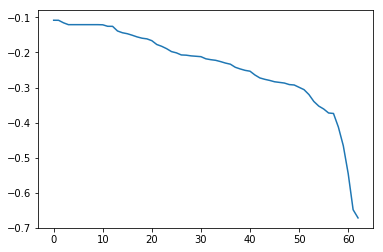

In [185]:
r2 = [x[1] for x in cvResults]
plt.plot(range(len(cvResults)),r2)

In [186]:
stockHist = 4                          # How far in the past (days) do we look for stock
tweetHist = 8                         # How far in the past do we look for twitter

s = stocks['TSLA']
atts = ['apn']

X,y = getXy(stockHist,tweetHist,s,tweets,atts)

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30 , random_state=1)

In [188]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Fit regression model to the training set
regr.fit(X_train, y_train)

# Apply model to the test set
y_pred_test = regr.predict(X_test)
y_pred_train = regr.predict(X_train)



print("TRAIN Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_train, y_pred_train)) )
print("TRAIN R-square = %.4f" % r2_score(y_train, y_pred_train) )
print("TRAIN +/- accuracy = ", sum(np.sign(y_pred_train) == np.sign(y_train.values))[0]/len(y_pred_train))
print()
print("TEST Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)) )
print("TEST R-square = %.4f" % r2_score(y_test, y_pred_test) )
print("TEST +/- accuracy = ", sum(np.sign(y_pred_test) == np.sign(y_test.values))[0]/len(y_pred_test))
print()
print('Slope Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

TRAIN Root mean squared error = 5.8934
TRAIN R-square = 0.0999
TRAIN +/- accuracy =  0.6193548387096774

TEST Root mean squared error = 5.7512
TEST R-square = -0.0950
TEST +/- accuracy =  0.582089552238806

Slope Coefficients: [[ 9.58725860e-02 -5.91805082e-03 -2.97396166e-02 -1.44109115e-01
  -6.30485313e+01  2.96970733e-01 -3.39125717e-01  9.76220766e-02
  -1.01467729e-01  1.61190991e-01 -2.20098409e-02 -6.74668357e-02
   8.04989647e-03  7.68132499e-02 -9.86071030e-02]]
Intercept: [28.34352434]


In [189]:
X

,TSLA_d-1,TSLA_d-2,TSLA_d-3,TSLA_d-4,d-1_perP,d-1_app,d-1_apn,d-1_sentiment,d-2_anp,d-3_anp,d-4_anp,d-5_anp,d-6_anp,d-7_anp,d-8_anp
Date,,,,,,,,,,,,,,,
2015-05-05,4.479996,-0.020004,-6.399994,1.970001,0.478632,-41.605465,-38.158073,0.0,-40.760586,-41.793107,-33.497398,-40.348758,-47.707263,-24.620247,-33.587498
2015-05-06,2.440002,4.479996,-0.020004,-6.399994,0.533981,-30.688840,-35.236352,1.0,-38.158073,-40.760586,-41.793107,-33.497398,-40.348758,-47.707263,-24.620247
2015-05-07,-2.520004,2.440002,4.479996,-0.020004,0.521277,-39.823881,-43.314442,1.0,-35.236352,-38.158073,-40.760586,-41.793107,-33.497398,-40.348758,-47.707263
2015-05-08,6.370010,-2.520004,2.440002,4.479996,0.426230,-43.104224,-31.504624,0.0,-43.314442,-35.236352,-38.158073,-40.760586,-41.793107,-33.497398,-40.348758
2015-05-11,-0.190002,6.370010,-2.520004,2.440002,0.517241,-33.097546,-35.513166,1.0,-27.235620,-33.571111,-31.504624,-43.314442,-35.236352,-38.158073,-40.760586
2015-05-12,2.880004,-0.190002,6.370010,-2.520004,0.380952,-51.185838,-30.785042,0.0,-35.513166,-27.235620,-33.571111,-31.504624,-43.314442,-35.236352,-38.158073
2015-05-13,5.250000,2.880004,-0.190002,6.370010,0.490741,-40.974311,-39.401075,0.0,-30.785042,-35.513166,-27.235620,-33.571111,-31.504624,-43.314442,-35.236352
2015-05-14,-1.560012,5.250000,2.880004,-0.190002,0.472222,-42.366766,-37.647558,0.0,-39.401075,-30.785042,-35.513166,-27.235620,-33.571111,-31.504624,-43.314442
2015-05-15,0.920013,-1.560012,5.250000,2.880004,0.388235,-48.645894,-30.447617,0.0,-37.647558,-39.401075,-30.785042,-35.513166,-27.235620,-33.571111,-31.504624


In [190]:
#X.to_csv('./someData/onlyTSLAwTwitter.csv')